In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\DATA\product_info.csv")

In [3]:
df2=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\product_info_cleaned.csv")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1.head()

,ProductID,Category,Brand,Material,Weight(kg),Warranty(years),ProductRating,LaunchYear
0,P0001,Beauty,BrandB,Cotton,0.45,2,3.0,2021.0
1,P0002,Toys,BrandD,Plastic,0.63,1,4.8,2018.0
2,P0003,Home,BrandD,Wood,0.38,3,3.6,2021.0
3,P0004,Toys,BrandA,Metal,2.50,1,4.9,2019.0
4,P0005,Toys,BrandB,Cotton,2.99,0,3.5,2018.0


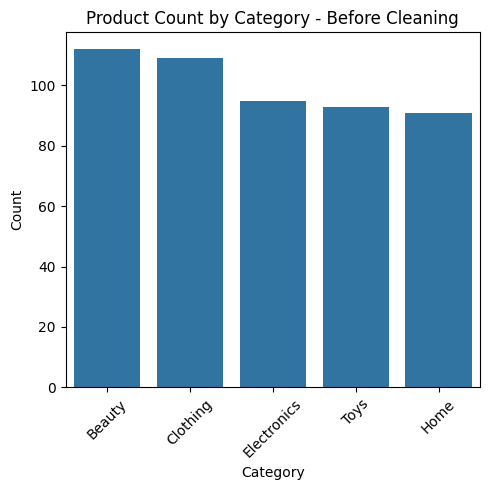

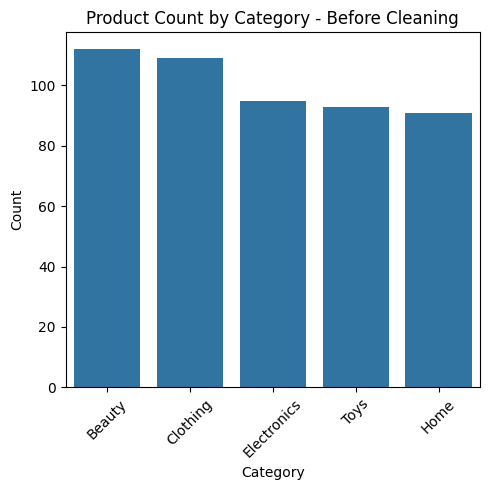

In [10]:


plt.figure(figsize=(5, 5))
sns.countplot(data=df1, x='Category', order=df1['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Product Count by Category - Before Cleaning")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



plt.figure(figsize=(5, 5))
sns.countplot(data=df2, x='Category', order=df2['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Product Count by Category - Before Cleaning")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


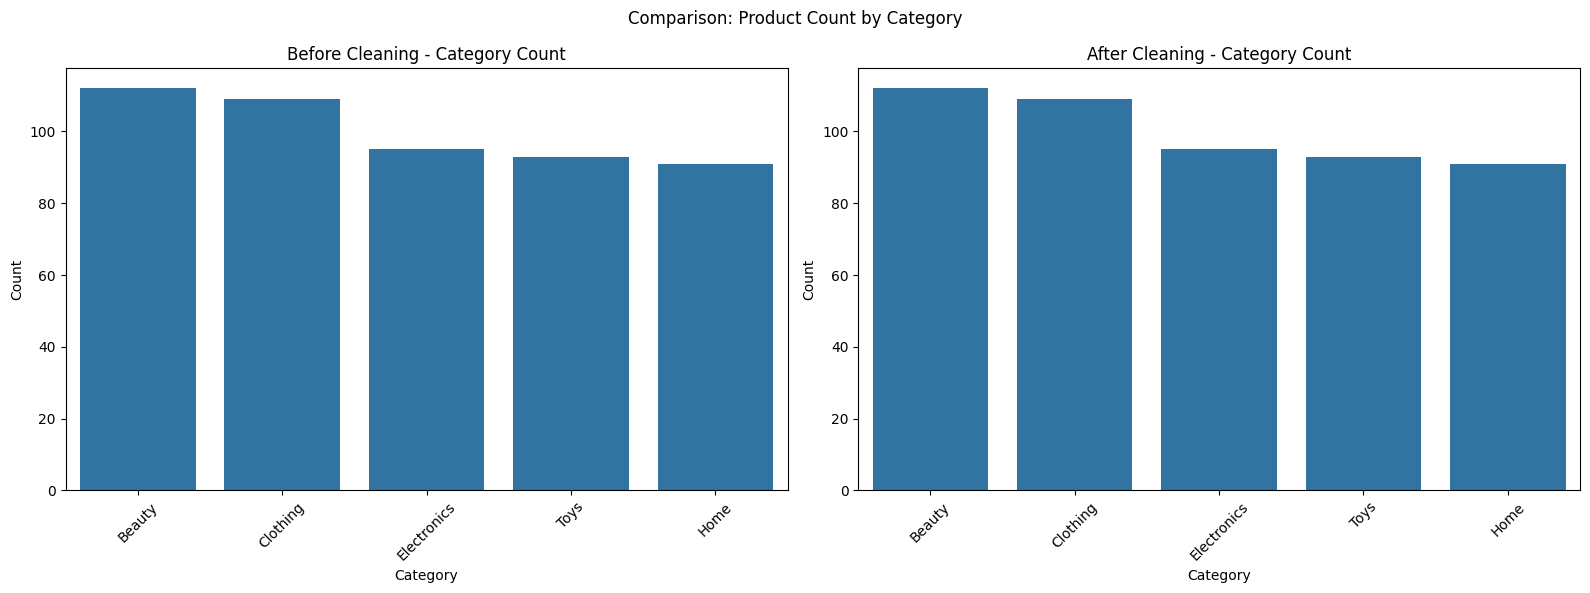

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before cleaning
sns.countplot(ax=axes[0], data=df1, x='Category', order=df1['Category'].value_counts().index)
axes[0].set_title("Before Cleaning - Category Count")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# After cleaning
sns.countplot(ax=axes[1], data=df2, x='Category', order=df2['Category'].value_counts().index)
axes[1].set_title("After Cleaning - Category Count")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Comparison: Product Count by Category")
plt.tight_layout()
plt.show()

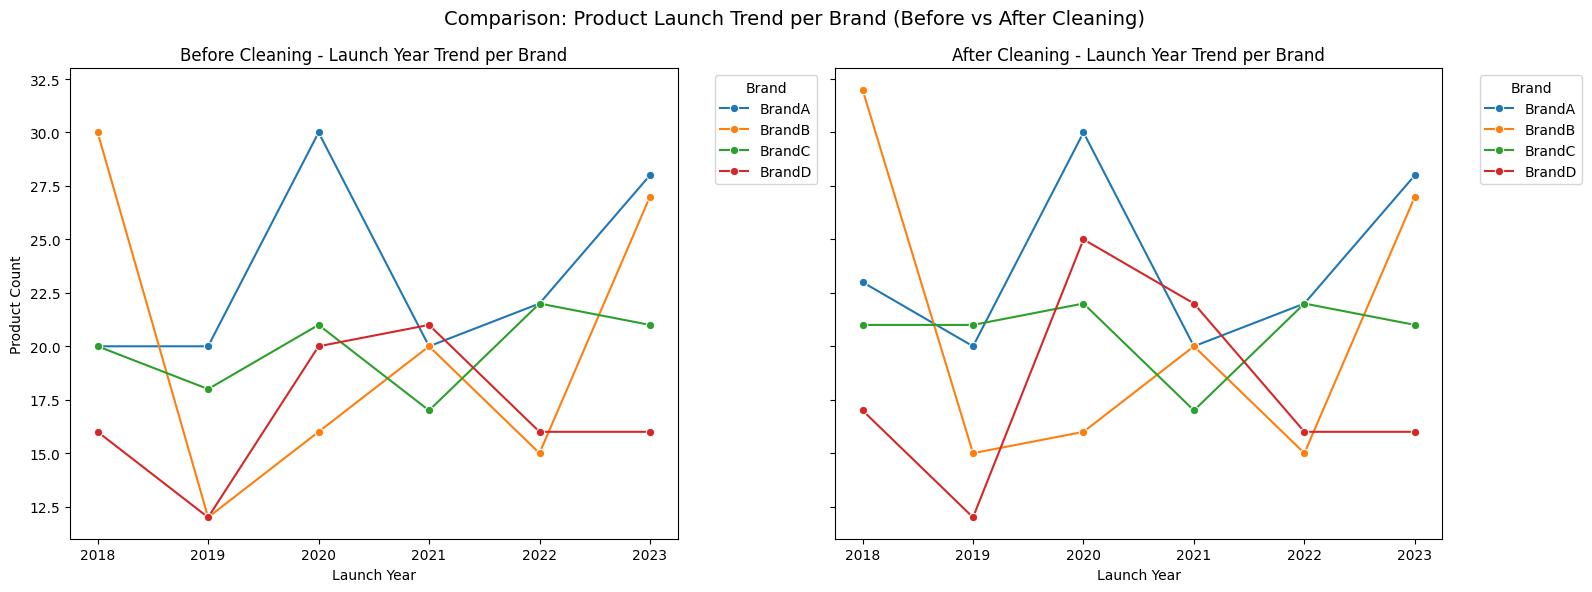

In [14]:

# Group by LaunchYear and Brand
brand_year_df1 = df1.groupby(['LaunchYear', 'Brand']).size().reset_index(name='Count')
brand_year_df2 = df2.groupby(['LaunchYear', 'Brand']).size().reset_index(name='Count')

# Set figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Before Cleaning Plot
sns.lineplot(ax=axes[0], data=brand_year_df1, x='LaunchYear', y='Count', hue='Brand', marker='o')
axes[0].set_title("Before Cleaning - Launch Year Trend per Brand")
axes[0].set_xlabel("Launch Year")
axes[0].set_ylabel("Product Count")
axes[0].legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# After Cleaning Plot
sns.lineplot(ax=axes[1], data=brand_year_df2, x='LaunchYear', y='Count', hue='Brand', marker='o')
axes[1].set_title("After Cleaning - Launch Year Trend per Brand")
axes[1].set_xlabel("Launch Year")
axes[1].set_ylabel("Product Count")
axes[1].legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle("Comparison: Product Launch Trend per Brand (Before vs After Cleaning)", fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
categorical_columns = ['Category', 'Brand', 'Material', 'LaunchYear']

for col in categorical_columns:
    print(f"\n🔸 Column: {col}")
    
    # Count values before and after cleaning
    raw_counts = df1[col].value_counts(dropna=False)
    cleaned_counts = df2[col].value_counts(dropna=False)
    
    # Merge and compare
    comparison = pd.concat([raw_counts, cleaned_counts], axis=1, keys=['Before', 'After']).fillna(0)
    comparison['Before'] = comparison['Before'].astype(int)
    comparison['After'] = comparison['After'].astype(int)
    
    comparison['Change'] = comparison['After'] - comparison['Before']
    comparison['% Change'] = (comparison['Change'] / comparison['Before'].replace(0, pd.NA)) * 100
    comparison['% Change'] = comparison['% Change'].round(2)

    print(comparison)



🔸 Column: Category
             Before  After  Change  % Change
Category                                    
Beauty          112    112       0       0.0
Clothing        109    109       0       0.0
Electronics      95     95       0       0.0
Toys             93     93       0       0.0
Home             91     91       0       0.0

🔸 Column: Brand
        Before  After  Change  % Change
Brand                                  
BrandA     143    143       0       0.0
BrandB     125    125       0       0.0
BrandC     124    124       0       0.0
BrandD     108    108       0       0.0

🔸 Column: Material
          Before  After  Change  % Change
Material                                 
Metal        108    108       0       0.0
Plastic      103    103       0       0.0
Cotton       102    102       0       0.0
Glass        100    100       0       0.0
Wood          87     87       0       0.0

🔸 Column: LaunchYear
            Before  After  Change  % Change
LaunchYear                  

In [18]:
df1.isnull().sum()

ProductID           0
Category            0
Brand               0
Material            0
Weight(kg)          0
Warranty(years)     0
ProductRating      30
LaunchYear         20
dtype: int64

In [19]:
df2.isnull().sum()

ProductID          0
Category           0
Brand              0
Material           0
Weight(kg)         0
Warranty(years)    0
ProductRating      0
LaunchYear         0
dtype: int64

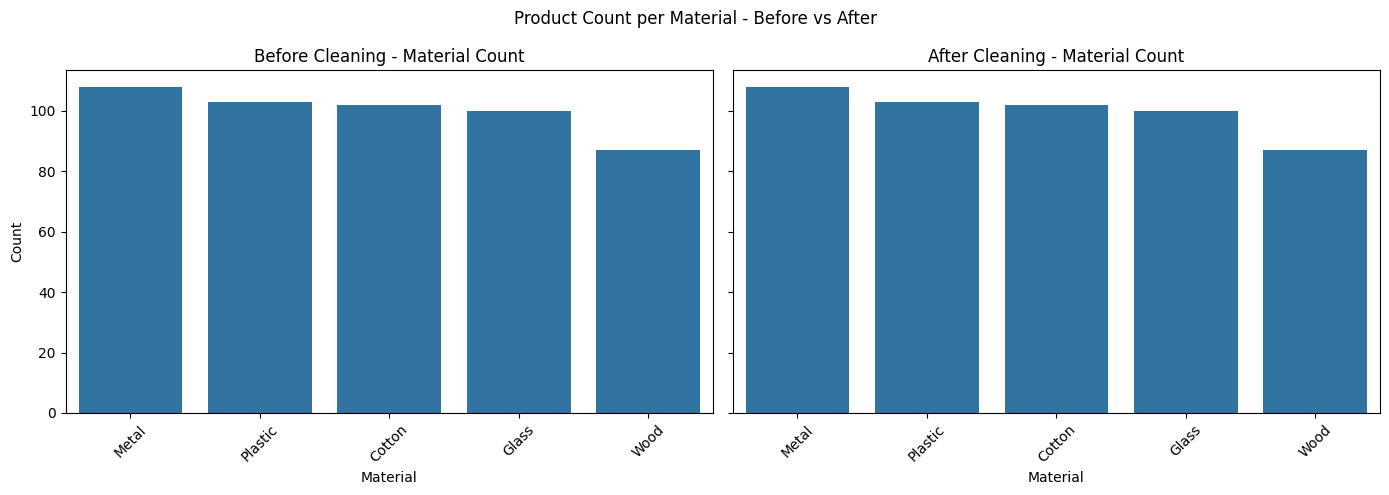

In [20]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Before
sns.countplot(ax=axes[0], data=df1, x='Material', order=df1['Material'].value_counts().index)
axes[0].set_title("Before Cleaning - Material Count")
axes[0].set_xlabel("Material")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# After
sns.countplot(ax=axes[1], data=df2, x='Material', order=df2['Material'].value_counts().index)
axes[1].set_title("After Cleaning - Material Count")
axes[1].set_xlabel("Material")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Product Count per Material - Before vs After")
plt.tight_layout()
plt.show()


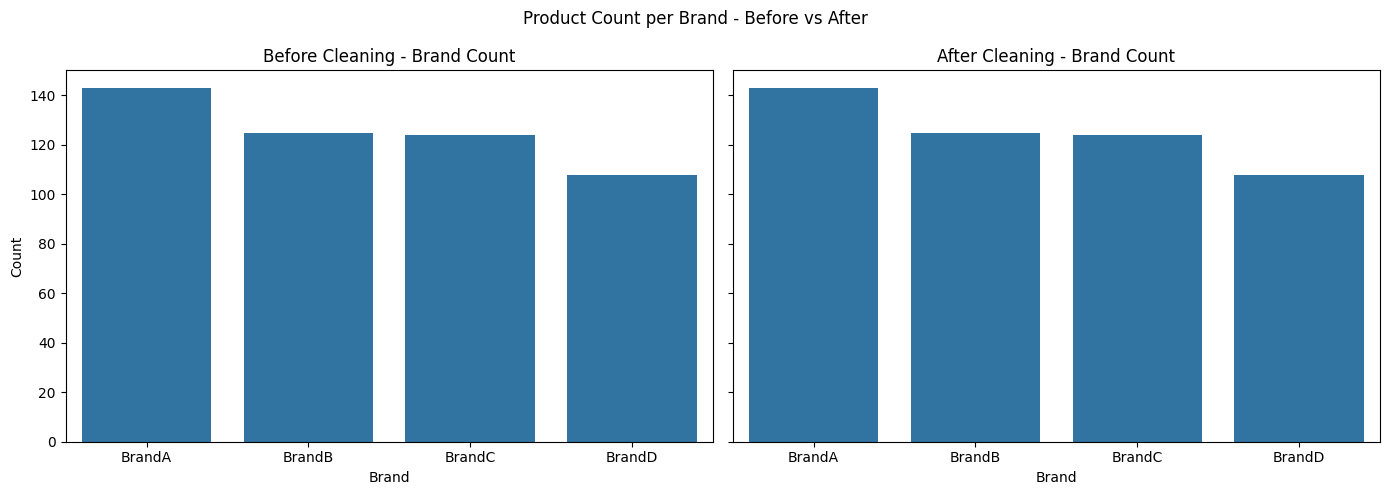

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.countplot(ax=axes[0], data=df1, x='Brand', order=df1['Brand'].value_counts().index)
axes[0].set_title("Before Cleaning - Brand Count")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Count")

sns.countplot(ax=axes[1], data=df2, x='Brand', order=df2['Brand'].value_counts().index)
axes[1].set_title("After Cleaning - Brand Count")
axes[1].set_xlabel("Brand")
axes[1].set_ylabel("Count")

plt.suptitle("Product Count per Brand - Before vs After")
plt.tight_layout()
plt.show()


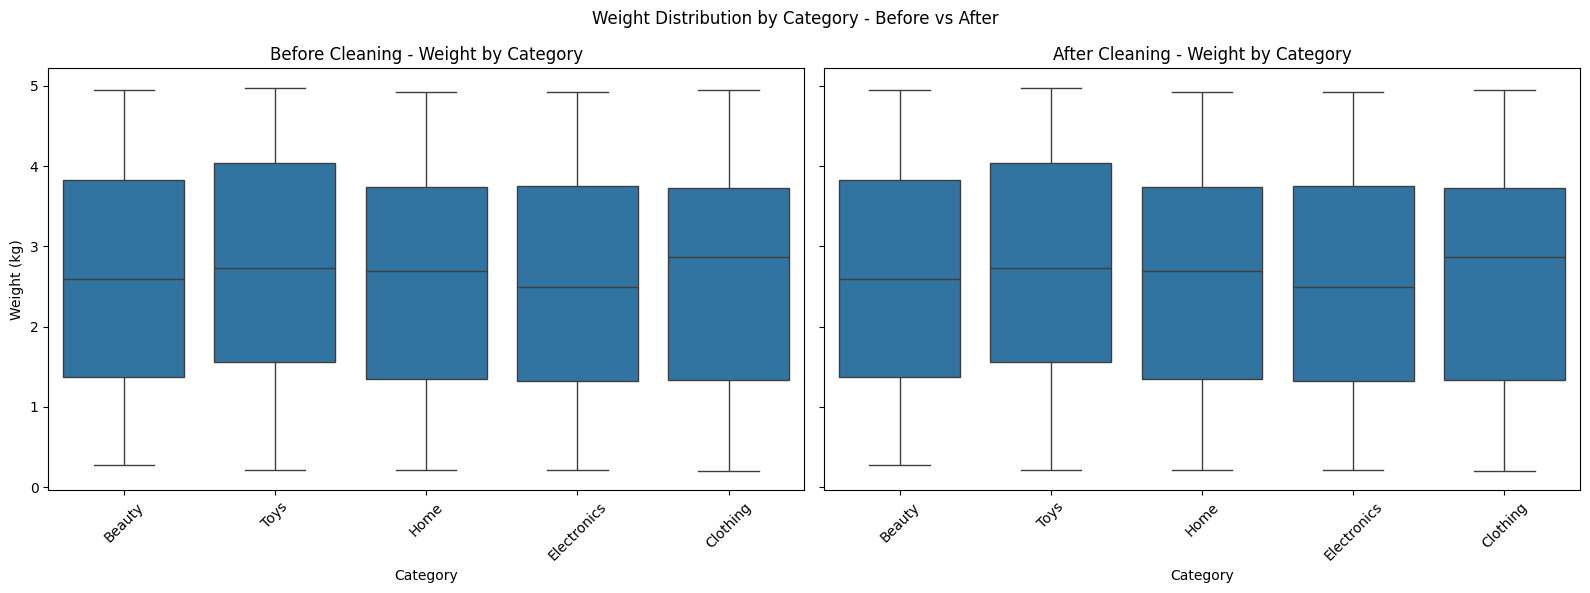

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.boxplot(ax=axes[0], data=df1, x='Category', y='Weight(kg)')
axes[0].set_title("Before Cleaning - Weight by Category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Weight (kg)")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], data=df2, x='Category', y='Weight(kg)')
axes[1].set_title("After Cleaning - Weight by Category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Weight (kg)")
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Weight Distribution by Category - Before vs After")
plt.tight_layout()
plt.show()


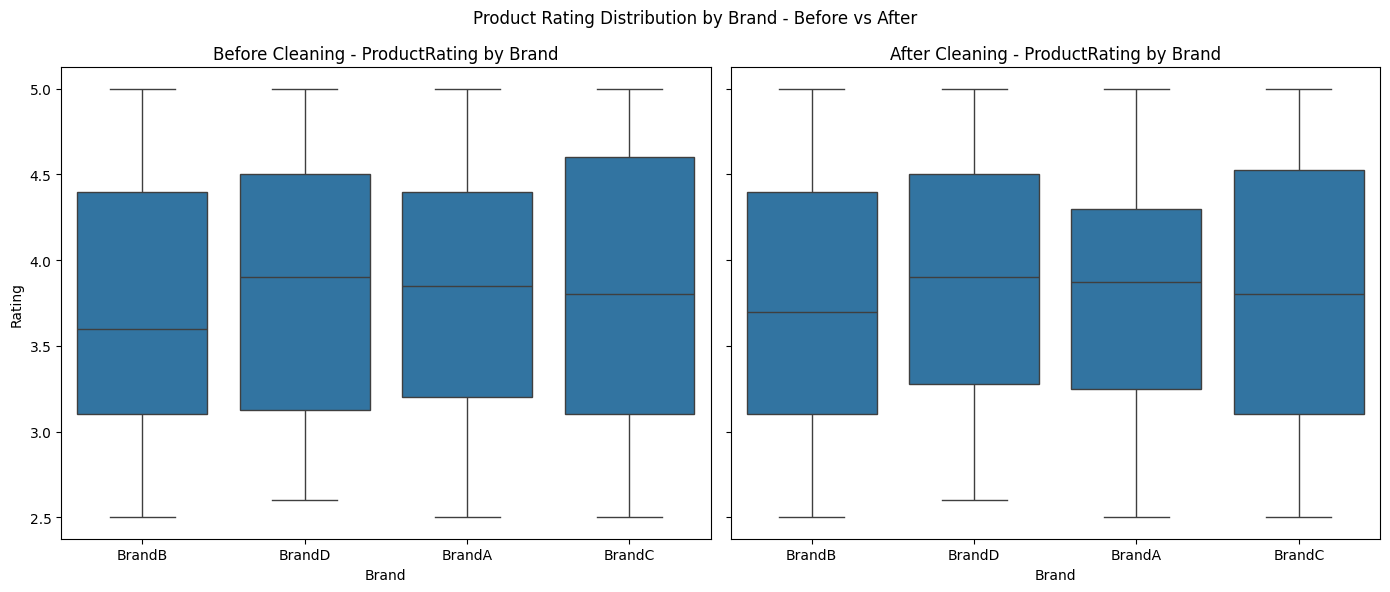

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(ax=axes[0], data=df1, x='Brand', y='ProductRating')
axes[0].set_title("Before Cleaning - ProductRating by Brand")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Rating")

sns.boxplot(ax=axes[1], data=df2, x='Brand', y='ProductRating')
axes[1].set_title("After Cleaning - ProductRating by Brand")
axes[1].set_xlabel("Brand")
axes[1].set_ylabel("Rating")

plt.suptitle("Product Rating Distribution by Brand - Before vs After")
plt.tight_layout()
plt.show()


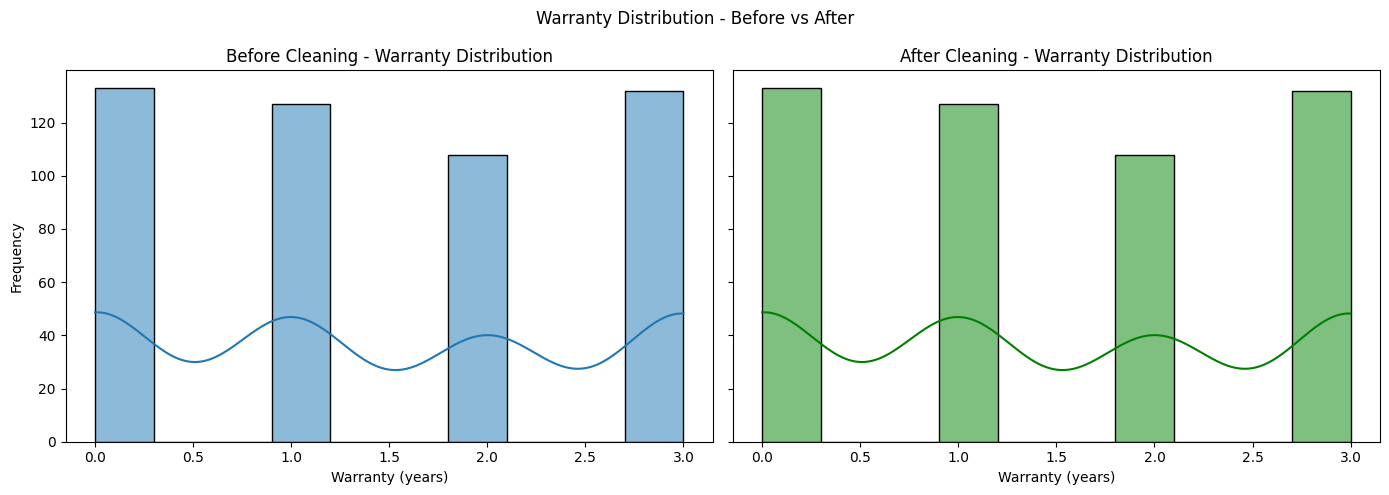

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(ax=axes[0], data=df1, x='Warranty(years)', bins=10, kde=True)
axes[0].set_title("Before Cleaning - Warranty Distribution")
axes[0].set_xlabel("Warranty (years)")
axes[0].set_ylabel("Frequency")

sns.histplot(ax=axes[1], data=df2, x='Warranty(years)', bins=10, kde=True, color='green')
axes[1].set_title("After Cleaning - Warranty Distribution")
axes[1].set_xlabel("Warranty (years)")
axes[1].set_ylabel("Frequency")

plt.suptitle("Warranty Distribution - Before vs After")
plt.tight_layout()
plt.show()
